Dimensionality reducton methods = PCA , AutoEncoder , FactorAnalyze , ICA , t-SNE

Normalizer = MinMaxScaler

Clustering = KNN - ...


In [3]:
#import Packages
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA as ICA
from sklearn.decomposition import FactorAnalysis
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader , TensorDataset
from torchvision import transforms
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [684]:
##Kermits Brain
class Kermit():
    def __init__(self,database,random_sead):
        self.database = database
        self.random_sead = random_sead
        self.errors = []
        
   #Normalize function     
    def Normalize(self):
        self.data = MinMaxScaler()
        return self.data.fit_transform(self.database)
        
    #PCA function         
    def PCA(self,data,n_component):
        self.datapca = PCA(n_components=n_component,random_state=self.random_sead)
        return self.datapca.fit_transform(data)

    #ICA function            
    def ICA(self,data,n_component):
        self.dataica = ICA(n_components=n_component,random_state=self.random_sead)
        return self.dataica.fit_transform(data)
    #FactorAnalysis function
    def FactorAnalysis(self,data,n_component):
        self.datafactoranalysis = FactorAnalysis(n_components=n_component,random_state=self.random_sead)
        return self.datafactoranalysis.fit_transform(data)
    
    #AutoEncoder function for feature extraction
    def AE(self,data,batch_size,n_component,shuffle=True,num_workers=0):
            self.features = []
            self.outputs = []
            print("Creating Datasets...")
            class spikedataset(Dataset):
                def __init__(self,transform=None):
                    #dta loading
                    self.wawes =  torch.tensor(data).type('torch.FloatTensor')
                    self.len_samples = len(self.wawes)
                    self.features_samples = len(self.wawes[0])
                    self.transform = transform
                    print(type(self.wawes))
                
                def __getitem__(self,index):
                    #getting item and indexing
                    sample = self.wawes[index]
                    if self.transform:
                        sample = self.transform(sample)
                    return sample
                        
                    
                def __len__(self):
                    #number of samples
                    return self.len_samples
            #calling Database class   
            gg = spikedataset()
            dataloader = DataLoader(dataset=gg,batch_size=batch_size,shuffle=shuffle,num_workers=num_workers)
            
            #starting model class
            print("########### Dataset Loaded! ########### ")
            print("########### Creating Deep Autoencoder Model... ###########")
            class Autoencoder(nn.Module):
                    def __init__(self):
                        super().__init__()
                        #shape of Data from N to V 
                        self.encoder = nn.Sequential(
                            nn.Linear(48,32),
                            nn.ReLU(),
                            nn.Linear(32,16),
                            nn.ReLU(),
                            nn.Linear(16,2),
                            
                        )
                        #Shape of Data from V to N
                        self.decoder = nn.Sequential(
                            nn.Linear(2,16),
                            nn.ReLU(),
                            nn.Linear(16,32),
                            nn.ReLU(),
                            nn.Linear(32,48),
                            nn.Sigmoid()
                            
                        )
                    
                    
                    def forward(self, x):
                        encoded = self.encoder(x)
                        decoded = self.decoder(encoded)
                        return encoded,decoded
                # NOTE : [-1 -> 1] -> tanh function
            print("########### Model Created ###########")
            model = Autoencoder()
            criterion = nn.MSELoss()
            optimizer = optim.Adam(model.parameters(),lr=1e-3) #weight_decay=1e-5
            num_epochs = 60
            print("########### Start Training ... ########### ")
            for epoch in range(num_epochs):
                for (step,spikes) in enumerate(dataloader):
                    recon_encod,recon_decode = model(spikes)
                    loss = criterion(recon_decode,spikes)
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
                    
                print(f'Epochs: {epoch+1}, Loss: {loss.item():.4f}')
                self.outputs.append((epoch,spikes.detach().numpy(),recon_decode.detach().numpy()))
                self.features.append((epoch,recon_encod.detach().numpy()))
            return self.outputs , self.features
        
    #KNN Fucnction with Distance from Centeroids
    def KNN(self,data,k_max_number):
        
        for i in range(k_max_number):
                X = data
                model = KMeans(n_clusters=i+1)
                # fit the model
                model.fit(X)
                # assign a cluster to each example
                yhat = model.predict(X)
                # retrieve unique clusters
                clusters = unique(yhat)
                cent = model.cluster_centers_
                
                error=[]
                
            
                for ii in clusters:
                    for i in range(len(zz[yhat==ii])):
                        temp = []
                        gg =(zz[yhat==ii][i][0]-cent[ii][0])**2 + (zz[yhat==ii][i][1]-cent[ii][1])**2
                        temp.append(gg)
                        
                    error.append(np.sum(temp))
                #print(np.sum(error))
                self.errors.append(np.sum(error))
        print(f'Number of Neurons: {np.argmin(self.errors)+1}')
                
        

In [9]:
#loading Data
session1wf=np.load("Sample_data.npy")

In [687]:
#setting Brain!
brainkermit=Kermit(session1wf,42)

In [688]:
#normalize data
norm = brainkermit.Normalize()

In [689]:
#reconstructed Outputs and extracted features
outputs,features = brainkermit.AE(norm,300)

Creating Datasets...
<class 'torch.Tensor'>
########### Dataset Loaded! ########### 
########### Creating Deep Autoencoder Model... ###########
########### Model Created ###########
########### Start Training ... ########### 
Epochs: 1, Loss: 0.0333
Epochs: 2, Loss: 0.0332
Epochs: 3, Loss: 0.0331
Epochs: 4, Loss: 0.0330
Epochs: 5, Loss: 0.0329
Epochs: 6, Loss: 0.0328
Epochs: 7, Loss: 0.0327
Epochs: 8, Loss: 0.0326
Epochs: 9, Loss: 0.0325
Epochs: 10, Loss: 0.0324
Epochs: 11, Loss: 0.0323
Epochs: 12, Loss: 0.0322
Epochs: 13, Loss: 0.0321
Epochs: 14, Loss: 0.0320
Epochs: 15, Loss: 0.0318
Epochs: 16, Loss: 0.0317
Epochs: 17, Loss: 0.0316
Epochs: 18, Loss: 0.0315
Epochs: 19, Loss: 0.0313
Epochs: 20, Loss: 0.0312
Epochs: 21, Loss: 0.0310
Epochs: 22, Loss: 0.0309
Epochs: 23, Loss: 0.0308
Epochs: 24, Loss: 0.0306
Epochs: 25, Loss: 0.0304
Epochs: 26, Loss: 0.0303
Epochs: 27, Loss: 0.0301
Epochs: 28, Loss: 0.0299
Epochs: 29, Loss: 0.0297
Epochs: 30, Loss: 0.0295
Epochs: 31, Loss: 0.0293
Epochs: 

In [690]:
#calling features
zz=features[59][1]

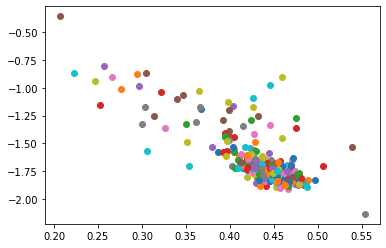

In [691]:
#plotting Features
for i in range(300):
    plt.plot(zz[i][0],zz[i][1],marker="o")

In [676]:
#calling orginal data! Look at 1 index , it means orginal ! if it was 2 => showed reconstructed datas
ffff=outputs[59][1]

In [677]:
#extracting Features of orginal data with PCA
pcc = PCA(n_components=2)
pcc.fit(ffff)
xnew = pcc.transform(ffff)

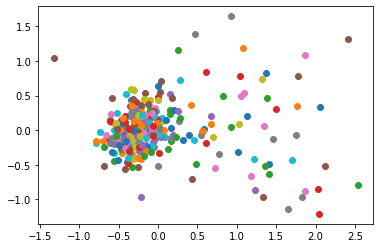

In [678]:
for i in range(300):
    plt.plot(xnew[i][0],xnew[i][1],marker='o')


In [692]:
#runnig KNN clustering with distance error
brainkermit.KNN(zz,3)

Number of Neurons: 2


In [693]:
#printing Error for diffrernt K!
brainkermit.errors

[0.3136910748678057, 0.01344316593524475, 0.022145716792562276]